In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
#Data Generation
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

print(len(xs))

print(xs[0])
print(zs[0])

1000
[-9.24882742]
[-3.82641156]


In [20]:
generated_inputs = np.column_stack((xs,zs))
print(generated_inputs[0])

[-9.24882742 -3.82641156]


In [21]:
# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))
print(len(noise))

1000


In [22]:
# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [23]:
input_size = 2
output_size = 1

In [24]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

print(inputs)
print(targets)

Tensor("Placeholder_2:0", shape=(?, 2), dtype=float32)
Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [25]:
weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

print(weights)
print(biases)

<tf.Variable 'Variable_2:0' shape=(2, 1) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [26]:
outputs = tf.matmul(inputs, weights) + biases
print(outputs)

Tensor("add_1:0", shape=(?, 1), dtype=float32)


In [27]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
print(mean_loss)

Tensor("truediv_1:0", shape=(), dtype=float32)


In [28]:
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)
print(optimize)

name: "GradientDescent_1"
op: "NoOp"
input: "^GradientDescent_1/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent_1/update_Variable_3/ApplyGradientDescent"



In [29]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()
sess.run(initializer)

In [30]:
training_data = np.load('TF_intro.npz')

In [31]:
for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

214.18
93.0686
43.8983
23.4073
14.4908
10.3275
8.16663
6.88304
6.00781
5.34049
4.79229
4.3218
3.90825
3.54012
3.21023
2.91357
2.6463
2.40527
2.18777
1.99146
1.81425
1.65425
1.5098
1.37937
1.26161
1.15528
1.05927
0.972582
0.894309
0.823635
0.759822
0.702203
0.650178
0.603203
0.560788
0.52249
0.487911
0.456687
0.428495
0.40304
0.380055
0.359303
0.340564
0.323644
0.308367
0.294573
0.282118
0.270872
0.260718
0.251549
0.24327
0.235796
0.229046
0.222952
0.217449
0.212481
0.207995
0.203944
0.200287
0.196985
0.194003
0.19131
0.18888
0.186685
0.184703
0.182913
0.181297
0.179839
0.178521
0.177332
0.176258
0.175288
0.174412
0.173622
0.172908
0.172263
0.171681
0.171156
0.170682
0.170253
0.169866
0.169517
0.169202
0.168917
0.16866
0.168428
0.168218
0.168029
0.167858
0.167703
0.167564
0.167438
0.167325
0.167222
0.16713
0.167046
0.16697
0.166902
0.166841
0.166785


In [32]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

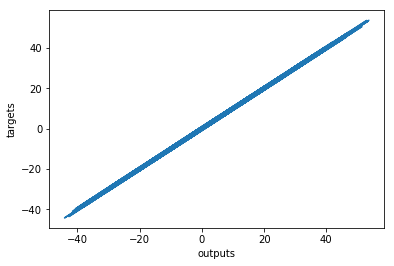

In [33]:
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [34]:
w = sess.run([weights], 
               feed_dict={inputs: training_data['inputs']})
               
b = sess.run([biases], 
               feed_dict={inputs: training_data['inputs']})

print (w)
print (b)

[array([[ 2.00320244],
       [-3.00018477]], dtype=float32)]
[array([ 4.98046255], dtype=float32)]
